# TPP10 Work by Ziyang Lin

We apply the same method to another dataset (Participant 5).

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

dataset_path = Path('../../../datasets')
raw_data_p5 = pd.read_csv(dataset_path / 'Participant-05-detail.csv')
data_p5 = raw_data_p5.copy()
raw_data_p5.head()

,Source,Date,Hour,Count
0,person5,2022-01-27,8,4
1,person5,2022-01-02,13,78
2,person5,2022-01-02,12,66
3,person5,2022-01-02,12,57
4,person5,2022-01-02,12,99


In [13]:
data_p5[['Year', 'Month', 'Day']] = data_p5['Date'].str.split('-', 2, expand=True).astype('int')
data_p5['Timestamp'] = pd.to_datetime(data_p5[['Year', 'Month', 'Day', 'Hour']])
data_p5['Weekday'] = data_p5['Timestamp'].dt.weekday

cleaned_p5 = data_p5[['Timestamp', 'Weekday', 'Year', 'Month', 'Day', 'Hour', 'Count']]
cleaned_p5.head()

,Timestamp,Weekday,Year,Month,Day,Hour,Count
0,2022-01-27 08:00:00,3,2022,1,27,8,4
1,2022-01-02 13:00:00,6,2022,1,2,13,78
2,2022-01-02 12:00:00,6,2022,1,2,12,66
3,2022-01-02 12:00:00,6,2022,1,2,12,57
4,2022-01-02 12:00:00,6,2022,1,2,12,99


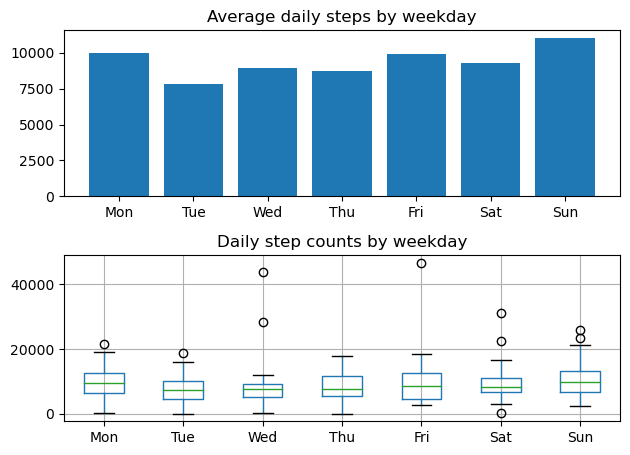

In [14]:
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily_sums = data_p5.groupby(['Year', 'Month', 'Day', 'Weekday'], as_index=False)['Count'].sum()
# daily_sums['WeekdayStr'] = daily_sums['Weekday'].map(lambda x : weekdays[x])
weekday_avgs = daily_sums.groupby('Weekday')['Count'].agg(np.average)

fig, axs = plt.subplots(2, 1)
axs[0].bar(weekdays, weekday_avgs)
axs[0].set_title('Average daily steps by weekday')

daily_sums.boxplot(column='Count', by='Weekday', ax=axs[1])
axs[1].set_title('Daily step counts by weekday')
axs[1].set_xticks(np.arange(7) + 1, labels=weekdays)
axs[1].set_xlabel(None)

fig.suptitle('')
fig.tight_layout()
plt.show()

We can observe a lot of outliers in the box plot above compared to Participant 2. This likely indicates that Participant 5 is particularly active on a few days.

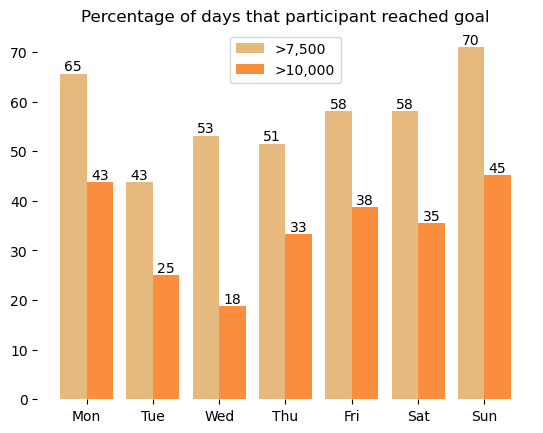

In [16]:
num_weekday_days = daily_sums.groupby('Weekday').size()
p_days_7500 = daily_sums[daily_sums['Count'] > 7500].groupby('Weekday').size() / num_weekday_days * 100
p_days_10000 = daily_sums[daily_sums['Count'] > 10000].groupby('Weekday').size() / num_weekday_days * 100

x = np.arange(7)
width = 0.4

fig, ax = plt.subplots()

bar_7500 = ax.bar(x - width / 2, p_days_7500, width=width, color='#E6BA7E', label='>7,500')
ax.bar_label(bar_7500, fmt='%d')
bar_10000 = ax.bar(x + width / 2, p_days_10000, width=width, color='#FA8D3E', label='>10,000')
ax.bar_label(bar_10000, fmt='%d')

ax.set(frame_on=False)
plt.title('Percentage of days that participant reached goal')
plt.xticks(x, labels=weekdays)
plt.legend()
plt.show()

The plot above indicates that the participant reaches the 7,500- and 10,000-step goals more often than Participant 2 overall. For this participant, Wednesday is the least active day.

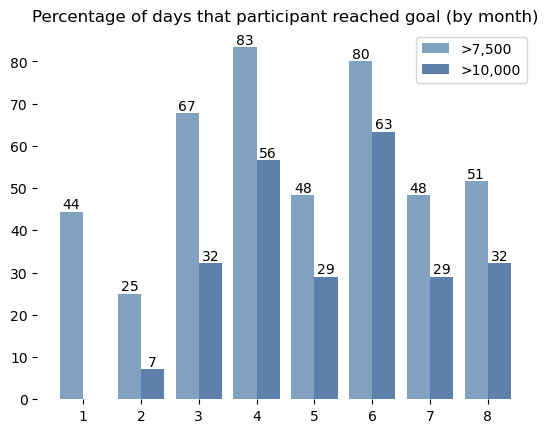

In [27]:
num_month_days = daily_sums.groupby('Month').size()
p_days_7500 = daily_sums[daily_sums['Count'] > 7500].groupby('Month').size() / num_month_days * 100
p_days_10000 = daily_sums[daily_sums['Count'] > 10000].groupby('Month').size() / num_month_days * 100

x = daily_sums['Month'].unique()
width = 0.4

fig, ax = plt.subplots()
bar_7500 = ax.bar(x - width / 2, p_days_7500, width=width, color='#81A1C1', label='>7,500')
ax.bar_label(bar_7500, fmt='%d')
bar_10000 = ax.bar(x + width / 2, p_days_10000, width=width, color='#5E81AC', label='>10,000')
ax.bar_label(bar_10000, fmt='%d')

ax.set(frame_on=False)
plt.title('Percentage of days that participant reached goal (by month)')
plt.legend()
plt.show()

From the above plot we can see that the participant did not reach the 10,000-step goal at all in January. When inspecting the dataset, we observed that they only wore the tracker for 9 days in January.

In [29]:
daily_sums[daily_sums['Month'] == 1]['Day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7, 10, 27])